<img src="./logo_UTN_3.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Trabajo semanal 4bis_bis
### Axel Nathanel Nahum


## Introduccion

En este notebook encontraremos el diseño de un filtro $Pasa-Banda$ apartir de una plantilla dada. Se realizara una transformacion de un $Pasa-Bajo$ a un $Pasa-Banda$, mediante un nucleo de transformacion. El $Pasa-Bajo$ se realizara mediante $Chebyshev$.

## Resolucion

### Resolucion original

In [24]:
from IPython.display import IFrame
IFrame("./Resolucion_4bis_bis.pdf", width=900, height=1000)

In [12]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

In [13]:
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS, pretty_print_lti

from pytc2.general import print_latex, print_subtitle

from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

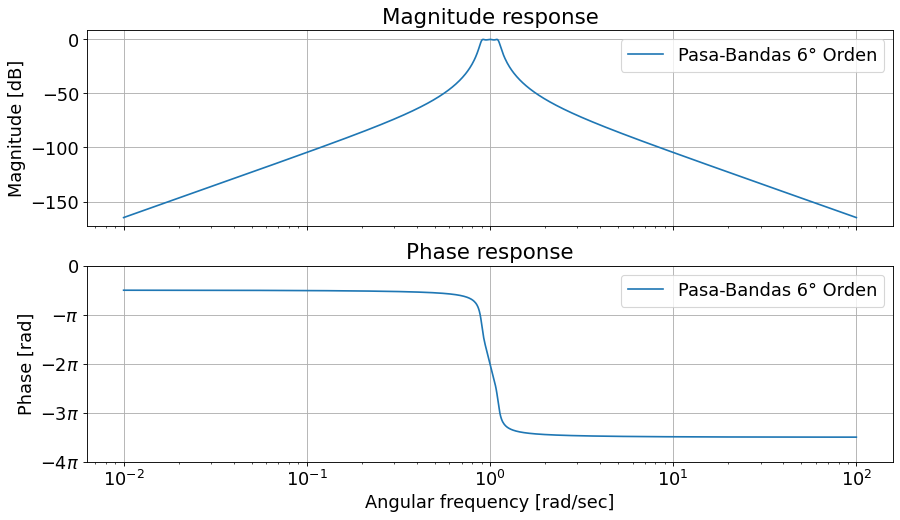

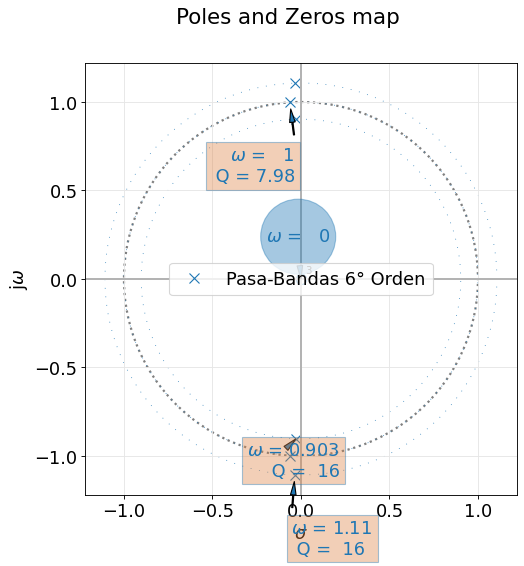

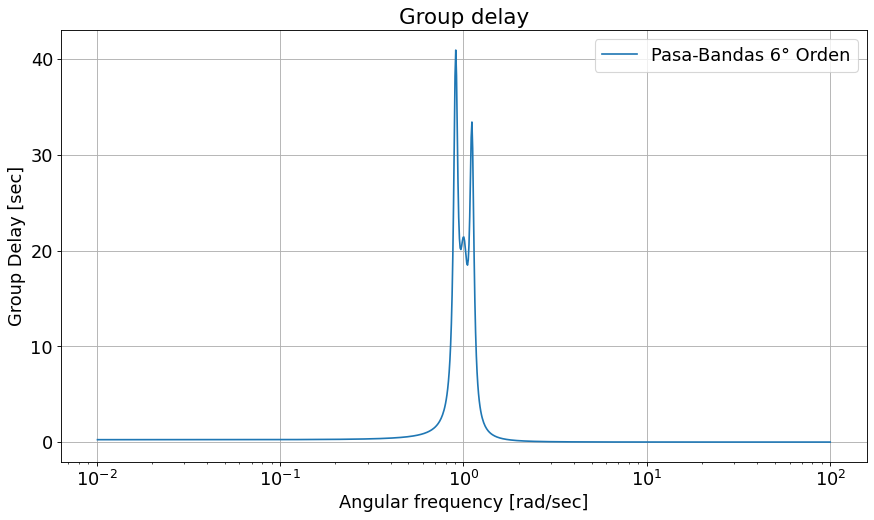

In [27]:
Q = 5

# Orden del filtro
nn = 3

αmax = 3
e = np.sqrt(10**(αmax/10) - 1) # "epsilon"

Z,P,K = sig.cheb1ap(nn, 0.5)
Num,Den = sig.zpk2tf(Z,P,K)
Num_pb,Den_pb = sig.lp2bp(Num,Den, bw = 1/Q)

TF = TransferFunction(Num_pb, Den_pb)

analyze_sys(TF, sys_name='Pasa-Bandas 6° Orden')

En estos graficos podremos observar y analizar la $respuesta$ $en$ $frecuencia$ $normalizada$ en distintos $\omega_0$ correspondiente a cada etapa de este filtro $Pasa-Bandas$ de $orden$ $6$, ademas de observar los polos y ceros de la transferencia calculada previamente. Los polos de este filtro se encuentran en distintos $\omega_0$ con sus respectivos Q.

$La$ $transferencia$ $asociada$ $a$ $estos$ $graficos$ $es:$

$$ T(s) = \frac{V_2}{V_1} = \frac{\frac{\omega_01}{Q1} . S}{s^2 + s. \frac{\omega_01}{Q1} + \omega_01^2} * \frac{\frac{\omega_02}{Q2} . S}{s^2 + s. \frac{\omega_02}{Q2} + \omega_02^2} * \frac{\frac{\omega_03}{Q3} . S}{s^2 + s. \frac{\omega_03}{Q3} + \omega_03^2}$$

$Donde:$

* $\omega_01 = 1.107$ y $Q1 = 16.05$. Esto es corresponde a una $transferencia$ $normalizada$.
* $\omega_02 = 0.903$ y $Q2 = 16.05$.
* $\omega_03 = 1$ y $Q3 = 7.98$.

En esta se puede observar claramente tres filtros $Pasa-Bandas$ en $cascada$, los tres de segundo orden. Esta transferencia se encuentra normalizada en los distintos $w_0$. Para desnormalizar, habria que usar el $Ω\omega_0$. Este sera igual a $2.\pi.22KHz$.

$$ T(s) = \frac{V_2}{V_1} = \frac{\frac{\omega_01}{Q1} . S}{s^2 + s. \frac{\omega_01}{Q1} + \omega_01^2} * \frac{\frac{\omega_02}{Q2} . S}{s^2 + s. \frac{\omega_02}{Q2} + \omega_02^2} * \frac{\frac{\omega_03}{Q3} . S}{s^2 + s. \frac{\omega_03}{Q3} + \omega_03^2}$$

Esta ultima sera representada por el grafico proximo de LTspice, eligiendo mostrarla solamente para una frecuencia de 1Hz. 

### Transferencia del Pasa-Bandas

In [7]:
import numpy as np

Q = 2.22

den = [1, 2 / Q, 3 + 2 / (Q ** 2), 4 / Q + 1 / Q**3, 3 + 2 / (Q ** 2), 2 / Q, 1]
print(f'Denominador: {den}')
roots = np.roots(den)
print("\n")
print(f'roots: {roots}')

Denominador: [1, 0.9009009009009008, 3.4058112166220273, 1.8932007244644204, 3.4058112166220273, 0.9009009009009008, 1]


roots: [-0.13429945+1.20788517j -0.13429945-1.20788517j -0.22522523+0.97430673j
 -0.22522523-0.97430673j -0.09092577+0.81778363j -0.09092577-0.81778363j]


In [8]:
polos_etapa_1 = roots[0]  # Y su conjugado
parte_real = polos_etapa_1.real
w0_polo = abs(polos_etapa_1)
print(f'Denominador etapa 1: s^2 + {-2*parte_real}*s + {w0_polo ** 2}')

polos_etapa_2 = roots[2]  # Y su conjugado
parte_real = polos_etapa_2.real
w0_polo = abs(polos_etapa_2)
print(f'Denominador etapa 2: s^2 + {-2*parte_real}*s + {w0_polo ** 2}')

polos_etapa_3 = roots[4]  # Y su conjugado
parte_real = polos_etapa_3.real
w0_polo = abs(polos_etapa_3)
print(f'enominador etapa 3: s^2 + {-2*parte_real}*s + {w0_polo ** 2}')

Denominador etapa 1: s^2 + 0.2685989029760419*s + 1.4770229162545476
Denominador etapa 2: s^2 + 0.45045045045045595*s + 1.0000000000000115
enominador etapa 3: s^2 + 0.1818515474744042*s + 0.6770375659003306


In [11]:
Q = 5

Z,P,K = sig.cheb1ap(3, 0.5)
Num,Den = sig.zpk2tf(Z,P,K)
Num_pb,Den_pb = sig.lp2bp(Num,Den, bw = 1/Q)
TF = tf2sos_analog(Num_pb, Den_pb)

print_subtitle('Filtro Pasa-Bajos Chebyshev')

pretty_print_lti(Num, Den)

print_subtitle('Filtro Pasa-Bandas previo a factorizar')

pretty_print_lti(Num_pb,Den_pb)

print_subtitle('Filtro Pasa-Bandas factorizado')

pretty_print_SOS(TF, mode='omegayq')

#### Filtro Pasa-Bajos Chebyshev

<IPython.core.display.Math object>

#### Filtro Pasa-Bandas previo a factorizar

<IPython.core.display.Math object>

#### Filtro Pasa-Bandas factorizado

<IPython.core.display.Math object>

En estos ultimos codigos se observan los distintos $denominadores$ de cada filtro. Tambien se puede observar en el PDF.

## Plantilla requerida

<img src="./Plantilla_4bis_bis.PNG" align="center" width="600" /> 

## Circuito LTspice (RLC)

<img src="./Circuito_4bis_bis_RLC.PNG" align="middle" width="1050" /> 

$Este$ $circuito$ $fue$ $realizado$ $con$ $los$ $valores$ $dados$ $por$ $python$ $y$ $no$ $los$ $calculados.$

## Respuesta en frecuencia LTspice 

Estas dos $respuestas$ tienen un $zoom$ en la parte relacionada con $cheby$. Esto con el objetivo de poder medir correctamente el $ancho$ $de$ $banda$ y los $0$ $db$.

### Atenuacion en f0 = 1Hz (Frecuencia central)

<img src="./Respuesta_Frecuencia_4bis_bis_RLC_1.PNG" align="middle" width="1000" /> 

En este grafico observamos que a una $frecuencia$ de $1$ $Hz$, la atenuacion es de aproximadamente $21dB$ $dB$. Esto se debe a que el valor del modulo de las etapas donde w0 no es 1, es $negativo$ $(en$ $db)$ y $menor$ a 1 $(en$ $veces)$, lo que nos lleva a tener $atenuacion$.

### Ancho de banda 

<img src="./Respuesta_Frecuencia_4bis_bis_RLC_2.PNG" align="middle" width="1000" /> 

En este grafico observamos el $αmax$ $de$ $0.5dB$ y ademas el $ancho$ $de$ $banda$. En una $frecuencia$ $normalizada$ de $0.905$, tenemos una $atenuacion$ de $21.67$ $dB$. Esta ultima es $0.5$ $dB$ $menor$, lo cual verifica lo requerido por la plantilla. Pasa lo mismo en una frecuencia de $1.105$. Entre estas dos frecuencias calculamos el ancho de banda. Este sera:

$$Bw = Fp2 - Fp1$$

Siendo: $Fp2 = 1.105$ y $Fp1 = 0.905$

Esta cuenta nos daria un BW de 0.2. Esto es acorde a la plantilla. Se verifica desde formula de:

$$Bw = \frac{\omega_0}{Q}$$

Siendo: $\omega_0 = 1$ y $Q = 5$

Esta cuenta, de igual manera que la anterior, nos daria un $BW$ de $0.2$, cumpliendose asi lo pedido por la $plantilla$.

### Respuesta en frecuencia (desde 100mHz hasta 10Hz)

<img src="./Respuesta_Frecuencia_4bis_bis_RLC.PNG" align="middle" width="1000" /> 

## Circuito LTspice (RLC activado con GIC)

<img src="./Circuito_4bis_bis.PNG" align="middle" width="1050" /> 

$Este$ $circuito$ $fue$ $realizado$ $con$ $los$ $valores$ $dados$ $por$ $python$ $y$ $no$ $los$ $calculados.$

## Respuesta en frecuencia LTspice 

Estas dos respuestas tienen un zoom en la parte relacionada con cheby. Esto con el objetivo de poder medir correctamente el ancho de banda y los 0 db.

### Ganancia en f0 = 1Hz (Frecuencia central)

<img src="./Respuesta_Frecuencia_4bis_bis_1_V2.PNG" align="middle" width="1000" /> 

En este grafico observamos que a una $frecuencia$ de $1$ $Hz$, la ganancia es de $0$ $dB$. Esto es asi porque no le di $ganancia$ aparte de la requerida por cada etapa.

### Ancho de banda 

<img src="./Respuesta_Frecuencia_4bis_bis_2.PNG" align="middle" width="1000" /> 

En este grafico observamos el $αmax$ $de$ $0.5dB$ y ademas el $ancho$ $de$ $banda$. En una $frecuencia$ $normalizada$ de $0.905$, tenemos una $atenuacion$ de $445.68$ $mdB$. Esta ultima es aproximadamente $0.5$ $dB$ $menor$, lo cual verifica lo requerido por la plantilla. Pasa lo mismo en una frecuencia de $1.105$. Entre estas dos frecuencias calculamos el ancho de banda. Este sera:

$$Bw = Fp2 - Fp1$$

Siendo: $Fp2 = 1.105$ y $Fp1 = 0.905$

Esta cuenta nos daria un BW de 0.2. Esto es acorde a la plantilla. Se verifica desde formula de:

$$Bw = \frac{\omega_0}{Q}$$

Siendo: $\omega_0 = 1$ y $Q = 5$

Esta cuenta, de igual manera que la anterior, nos daria un $BW$ de $0.2$, cumpliendose asi lo pedido por la $plantilla$.

### Respuesta en frecuencia (desde 100mHz hasta 10Hz)

<img src="./Respuesta_Frecuencia_4bis_bis.PNG" align="middle" width="1000" /> 

$En$ $el$ $ultimo$ $grafico$ $se$ $observa$ $la$ $respuesta$ $completa.$